In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [2]:
df = pd.read_csv("survey.csv")
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [5]:
df.describe(include= "all")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

<AxesSubplot:>

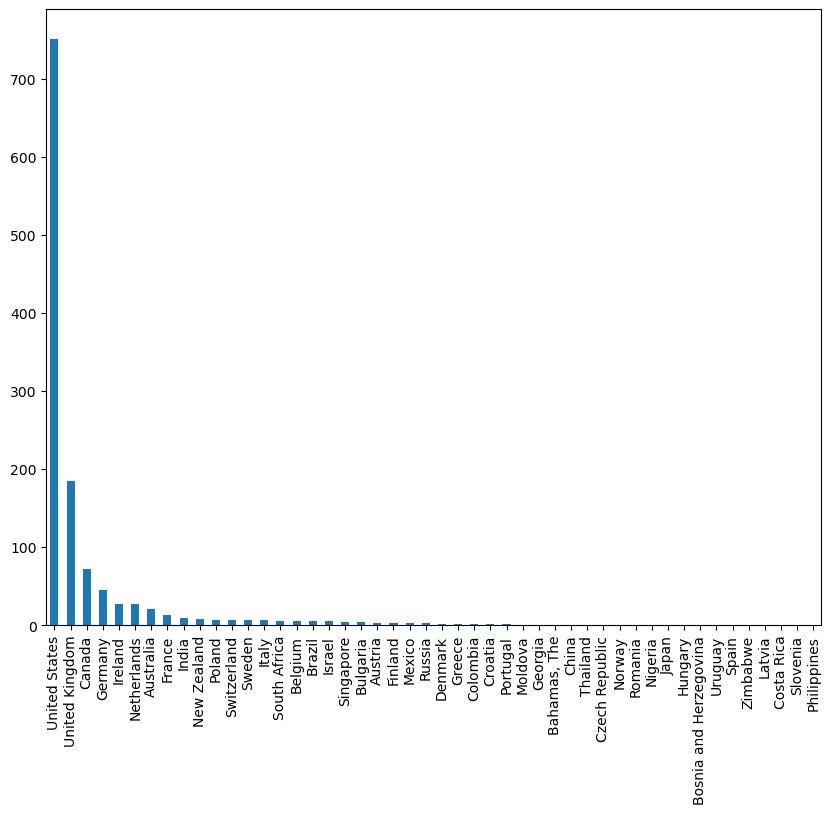

In [7]:
df['Country'].value_counts().plot(kind='bar', figsize=(10,8))

In [8]:
df.drop(['Country','state','Timestamp','comments'], axis =1, inplace=True)

In [9]:
df.isnull().sum()


Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [10]:
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [11]:
df['self_employed'].fillna('No', inplace=True)

In [12]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [13]:
df['work_interfere'].fillna('Don\'t know', inplace=True)

<AxesSubplot:>

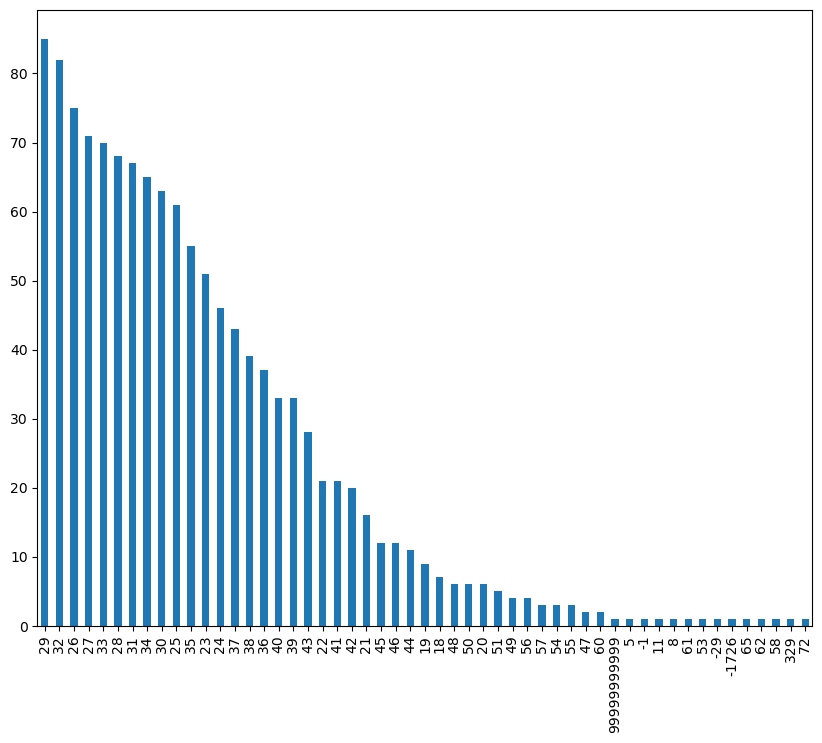

In [14]:
df['Age'].value_counts().plot(kind='bar', figsize=(10,8))

In [16]:
df.drop(df[(df['Age']>=60)|(df['Age'] <= 18)].index , inplace=True)
df['age_range'] = pd.cut(df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

<AxesSubplot:>

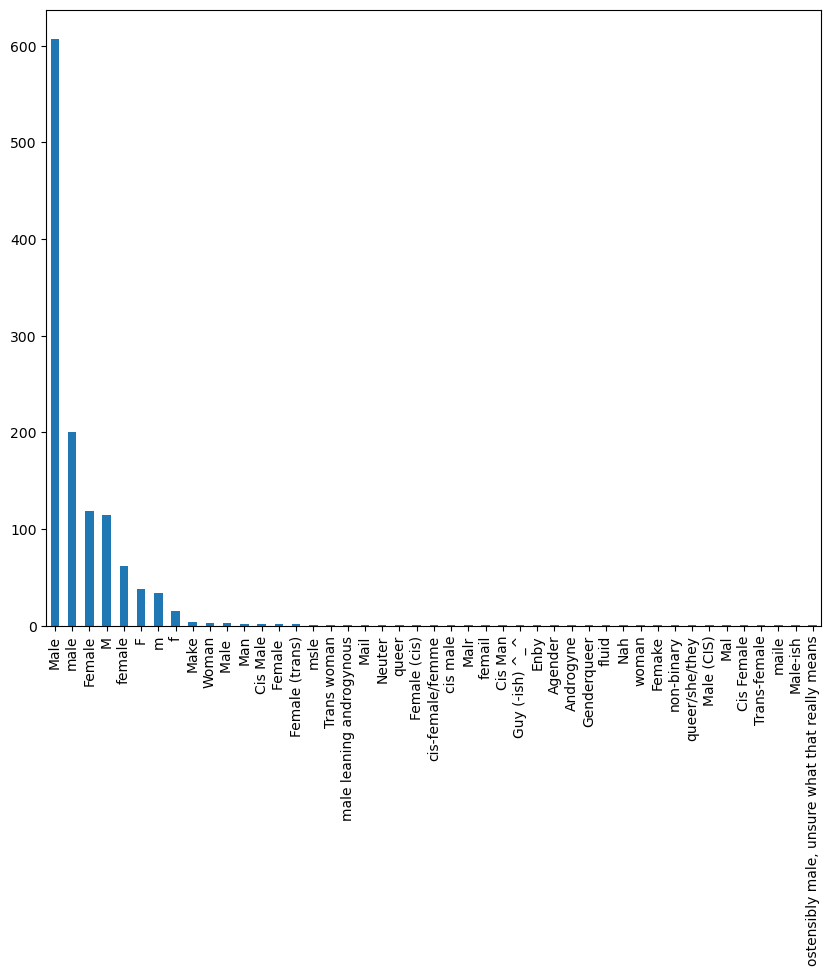

In [17]:
df['Gender'].value_counts().plot(kind='bar', figsize=(10,8))

In [18]:
df['Gender'].replace(["male",'Male','Male ', 'Man', "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male",'M' ,'Male' ,'Male-ish' ,'Mal', 'Male (CIS)','Make', 'Mail',
 'Malr' ,'Cis Man'], 'Male', inplace=True)


In [19]:
df['Gender'].replace(["cis female", 'Woman','Femake' ,"f", "female", "woman", 'Female (cis)', 'Female ',"femake", "female ","cis-female/femme", 'Female',"female (cis)", 'Cis Female', 'F',"femail"], 'Female', inplace=True )

In [20]:
df['Gender'].replace([ 'Trans-female', 'Transgender', 'Nah' ,'Enby' ,'Genderqueer',
 'Androgyne' ,'Agender', 'Guy (-ish) ^_^', 'Trans woman', 'Neuter','Female (trans)',"trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer",'All', 'A little about you', 'p', "ostensibly male, unsure what that really means"], 'Transgender' , inplace=True)

In [21]:
print(df['Gender'].unique())

['Female' 'Male' 'Transgender']


C:\Users\pradi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

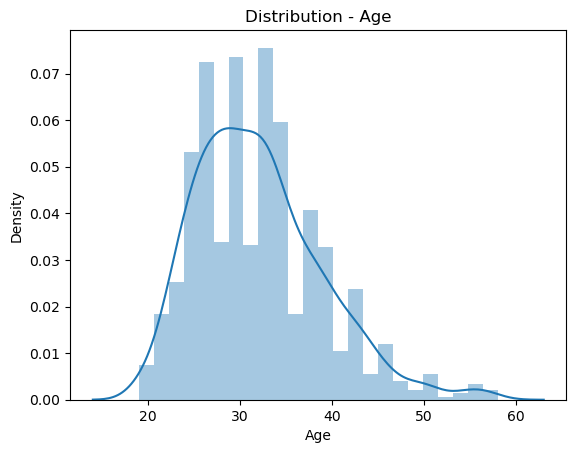

In [22]:


sb.distplot(df['Age'])
plt.title("Distribution - Age")
plt.xlabel('Age')

Text(0.5, 1.0, 'Tech Company')

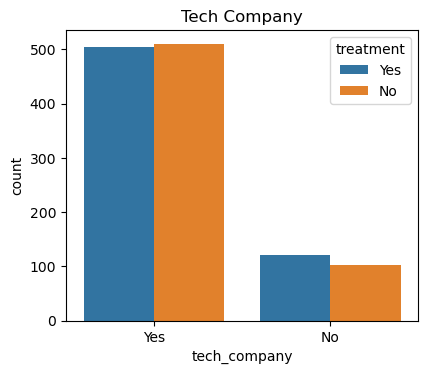

In [26]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(x ='tech_company', hue = "treatment", data = df)
plt.title('Tech Company')

Text(0.5, 1.0, 'Family_History')

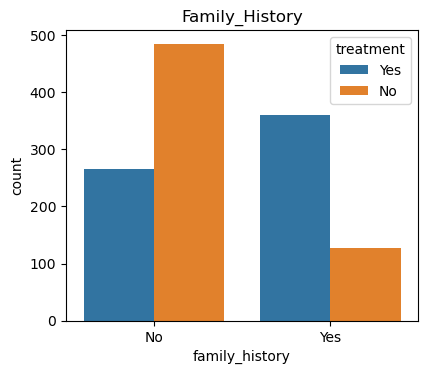

In [25]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
#sb.countplot(df['family_history'], hue = df['treatment'])
sb.countplot(x ='family_history', hue = "treatment", data = df)
plt.title("Family_History")

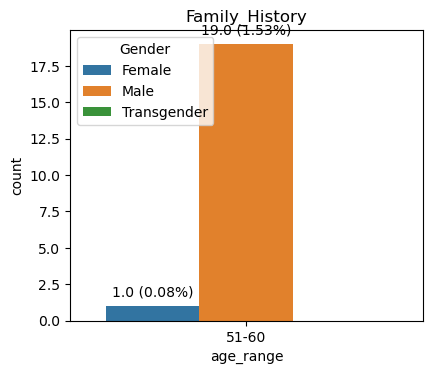

In [120]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 2)

# Create a count plot
ax = sb.countplot(x='age_range', hue='Gender', data=df)

# Display values and percentages on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(df) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Family_History")
plt.show()

In [61]:
df
df.to_csv('clean1.csv')

In [25]:
df.isnull().sum()
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,Yes,Don't know,26-100,No,Yes,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,21-30
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,31-65
1256,34,Male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,31-65
1257,46,Female,No,No,No,Don't know,100-500,Yes,Yes,No,...,Don't know,Yes,No,No,No,No,No,No,No,31-65


In [29]:
labelDict = {}
for feature in df:
    if feature == 'Age':
        pass
    else:
        le = preprocessing.LabelEncoder()
        le.fit(df[feature])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        df[feature] = le.transform(df[feature])
        # Get labels
        labelKey = 'label_' + feature
        labelValue = [*le_name_mapping]
        labelDict[labelKey] =labelValue

for key, value in labelDict.items():     
    print(key, value)

label_Gender [0, 1, 2]
label_self_employed [0, 1]
label_family_history [0, 1]
label_treatment [0, 1]
label_work_interfere [0, 1, 2, 3, 4]
label_no_employees [0, 1, 2, 3, 4, 5]
label_remote_work [0, 1]
label_tech_company [0, 1]
label_benefits [0, 1, 2]
label_care_options [0, 1, 2]
label_wellness_program [0, 1, 2]
label_seek_help [0, 1, 2]
label_anonymity [0, 1, 2]
label_leave [0, 1, 2, 3, 4]
label_mental_health_consequence [0, 1, 2]
label_phys_health_consequence [0, 1, 2]
label_coworkers [0, 1, 2]
label_supervisor [0, 1, 2]
label_mental_health_interview [0, 1, 2]
label_phys_health_interview [0, 1, 2]
label_mental_vs_physical [0, 1, 2]
label_obs_consequence [0, 1]
label_age_range [0, 1, 2]


In [31]:
x=df.drop(columns='treatment',axis=1)
y=df['treatment']

In [32]:
x.head()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,0,0,0,2,4,0,1,2,1,...,2,1,1,1,2,1,0,2,0,2
1,44,1,0,0,3,5,0,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,32,1,0,0,3,4,0,1,1,0,...,1,1,1,2,2,2,2,1,0,2
3,31,1,0,1,2,2,0,1,1,2,...,1,2,2,1,0,0,0,1,1,2
4,31,1,0,0,1,1,1,1,2,0,...,0,1,1,1,2,2,2,0,0,2


In [33]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: treatment, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8, random_state=49)

In [35]:
x_train.shape,y_train.shape

((990, 23), (990,))

In [36]:
x_test.shape,y_test.shape

((248, 23), (248,))

**Decision Tree**

In [57]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
#prediction
pred=DT.predict(x_test)
#Accuracy
from sklearn.metrics import accuracy_score
ac_DT = accuracy_score(pred,y_test)
print(ac_DT)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))
#Report
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

0.7580645161290323
[[ 88  34]
 [ 26 100]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       122
           1       0.75      0.79      0.77       126

    accuracy                           0.76       248
   macro avg       0.76      0.76      0.76       248
weighted avg       0.76      0.76      0.76       248



**Naive Bias**

In [58]:
from sklearn.naive_bayes import GaussianNB
model_sk=GaussianNB()
model_sk.fit(x_train,y_train)
y_pred=model_sk.predict(x_test)
#Accuracy
from sklearn.metrics import accuracy_score
ac_NB = accuracy_score(y_pred,y_test)
print(ac_NB)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))
#Report
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

0.7943548387096774
[[ 88  34]
 [ 26 100]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       122
           1       0.75      0.79      0.77       126

    accuracy                           0.76       248
   macro avg       0.76      0.76      0.76       248
weighted avg       0.76      0.76      0.76       248



**K-Nearest Neighbours**

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train.values, y_train.values)
knn
#prediction
knn_pred=knn.predict(x_test.values)
#Accuracy
from sklearn.metrics import accuracy_score
knn.score(x_train.values,y_train)
ac_knn = knn.score(x_test.values,y_test)
print(ac_knn)
#confusionmatrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))
#Report
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

0.7540322580645161
[[ 88  34]
 [ 26 100]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       119
           1       0.79      0.82      0.81       129

    accuracy                           0.79       248
   macro avg       0.79      0.79      0.79       248
weighted avg       0.79      0.79      0.79       248



C:\Users\pradi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pradi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

**Support Vector Machine**

In [61]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
#prediction
sv_pred=sv.predict(x_test)
#Accuracy
from sklearn.metrics import accuracy_score
sv.score(x_train,y_train)
ac_sv = sv.score(x_test,y_test)
print(ac_sv)
#confusionmatrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))
#Report
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

0.7983870967741935
[[ 88  34]
 [ 26 100]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       119
           1       0.79      0.82      0.81       129

    accuracy                           0.79       248
   macro avg       0.79      0.79      0.79       248
weighted avg       0.79      0.79      0.79       248



**Random Forest**

In [62]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
#Prediction
RF_pred = RF.predict(x_test)
#Accuracny
from sklearn.metrics import accuracy_score
ac_RF = RF.score(x_test,y_test)
print(ac_RF)
#confusionmatrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))
#Report
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

0.8588709677419355
[[ 88  34]
 [ 26 100]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       119
           1       0.79      0.82      0.81       129

    accuracy                           0.79       248
   macro avg       0.79      0.79      0.79       248
weighted avg       0.79      0.79      0.79       248



**Logistic Regression**

In [56]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(x_train, y_train)
#prediction
LR_pred = LR.predict(x_test)
#Accuracy
from sklearn.metrics import accuracy_score
ac_LR = LR.score(x_test,y_test)
print(ac_LR)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))
#Report
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

0.8064516129032258
[[ 91  28]
 [ 23 106]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       119
           1       0.79      0.82      0.81       129

    accuracy                           0.79       248
   macro avg       0.79      0.79      0.79       248
weighted avg       0.79      0.79      0.79       248



In [98]:
import plotly.express as px

In [61]:
x=df.drop(columns='treatment',axis=1)
y=df['treatment']

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [67]:
new_data = pd.DataFrame({
    
    'Age':31,
    'Gender':0,
    'self_employed':0,
    'family_history':1,
    'work_interfere':2,
    'no_employees':2,
    'remote_work':0,
    'tech_company':0,
    'benefits':1,
    'care_options':2,
    'wellness_program':0,
    'seek_help':0,
    'anonymity':1,
    'leave':0,
    'mental_health_consequence': 2,                                                          
  'phys_health_consequence':1,                                                       
  'coworkers':0,                                
  'supervisor':0,                                           
  'mental_health_interview':2,                                       
  'phys_health_interview':0,                                  
  'mental_vs_physical':1,                                      
  'obs_consequence':2,
    'age_range':2,
},index=[0])

In [68]:
new_data

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,31,0,0,1,2,2,0,0,1,2,...,0,2,1,0,0,2,0,1,2,2


In [70]:
p = RF.predict(new_data)
if p[0]==0:
  print("You do not need a treatment for mental health.")
else:
  print("You need a treatment for mental health.")

You need a treatment for mental health.


In [71]:
import joblib

In [72]:
joblib.dump(RF,'model_joblib_mental_health')

['model_joblib_mental_health']

In [73]:
model = joblib.load('model_joblib_mental_health')

In [74]:
model.predict(new_data)

array([1], dtype=int64)

Text(0.5, 1.0, 'Work Interfere')

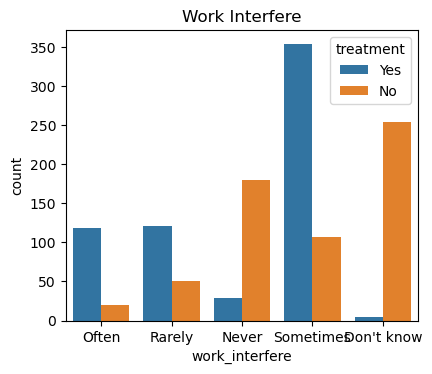

In [24]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
#sb.countplot(df['family_history'], hue = df['treatment'])
sb.countplot(x ='work_interfere', hue = "treatment", data = df)
plt.title("Work Interfere")

Text(0.5, 1.0, 'Remote Work')

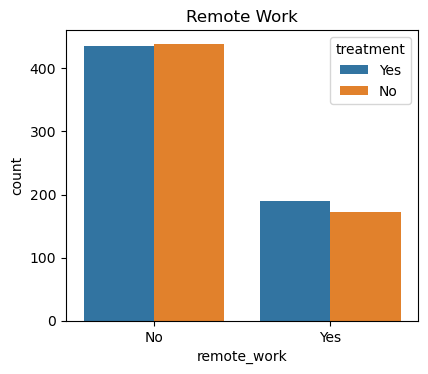

In [25]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
#sb.countplot(df['family_history'], hue = df['treatment'])
sb.countplot(x ='remote_work', hue = "treatment", data = df)
plt.title("Remote Work")

Text(0.5, 1.0, 'Tech Company')

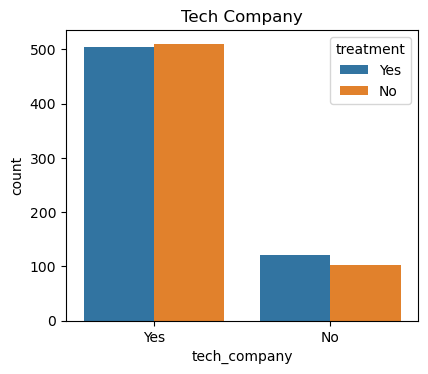

In [28]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
#sb.countplot(df['family_history'], hue = df['treatment'])
sb.countplot(x ='tech_company', hue = "treatment", data = df)
plt.title("Tech Company")

Text(0.5, 1.0, 'Mental vs Physical Health')

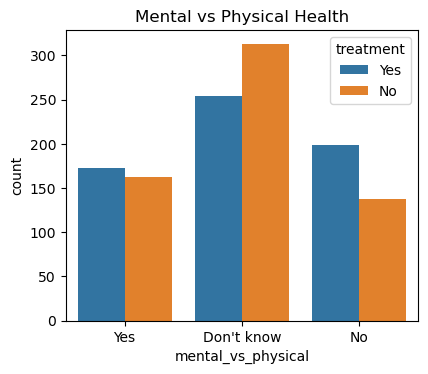

In [31]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
#sb.countplot(df['family_history'], hue = df['treatment'])
sb.countplot(x ='mental_vs_physical', hue = "treatment", data = df)
plt.title("Mental vs Physical Health")

Text(0.5, 1.0, 'Leave')

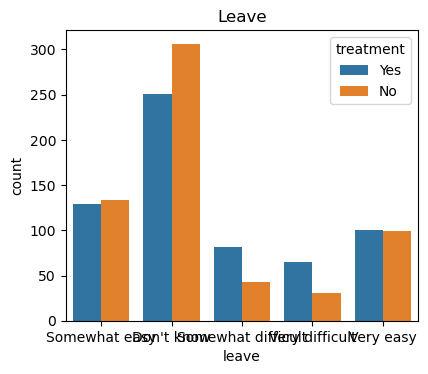

In [32]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
#sb.countplot(df['family_history'], hue = df['treatment'])
sb.countplot(x ='leave', hue = "treatment", data = df)
plt.title("Leave")

Text(0.5, 1.0, 'Coworkers')

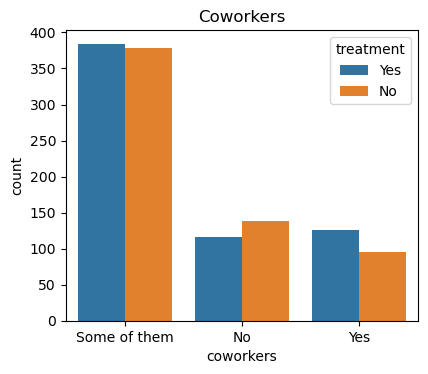

In [33]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
#sb.countplot(df['family_history'], hue = df['treatment'])
sb.countplot(x ='coworkers', hue = "treatment", data = df)
plt.title("Coworkers")

Text(0.5, 1.0, 'Discussion wiht interviewer')

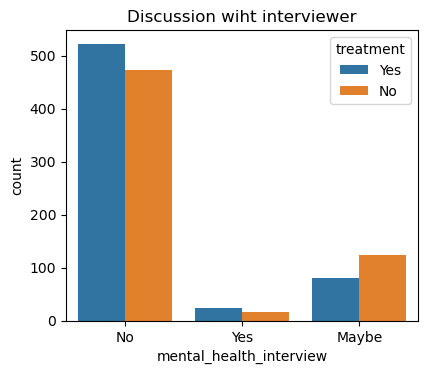

In [34]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
#sb.countplot(df['family_history'], hue = df['treatment'])
sb.countplot(x ='mental_health_interview', hue = "treatment", data = df)
plt.title("Discussion wiht interviewer")

Text(0.5, 1.0, 'Gender')

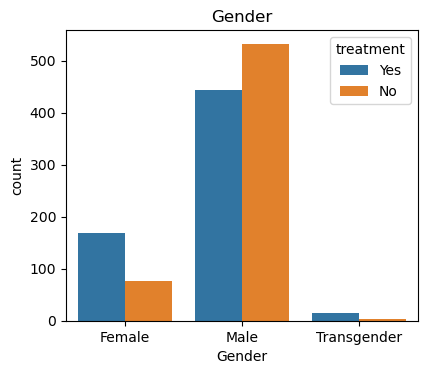

In [36]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
#sb.countplot(df['family_history'], hue = df['treatment'])
sb.countplot(x ='Gender', hue = "treatment", data = df)
plt.title("Gender")